In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/content/city_day.csv')


data.dropna(inplace=True)


print(data.describe())



             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.120000     0.000000     0

In [ ]:

relevant_features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'City', 'Date']

data['Pollutants_Average'] = data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']].mean(axis=1)

In [ ]:
X = data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_rf = RandomForestRegressor()

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

# Random Forest
y_pred_rf = model_rf.predict(X_test)
print("\nRandom Forest Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))



Linear Regression Metrics:
Mean Squared Error: 679.1269034340863
Mean Absolute Error: 18.575630319710974
R-squared: 0.9183762350621478

Random Forest Metrics:
Mean Squared Error: 451.761092147436
Mean Absolute Error: 14.47036858974359
R-squared: 0.9457031653332393


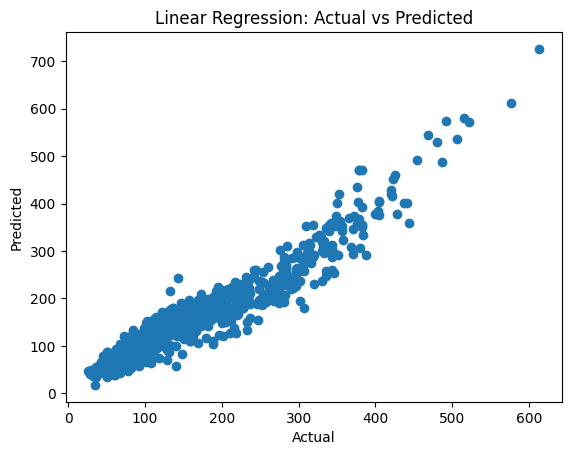

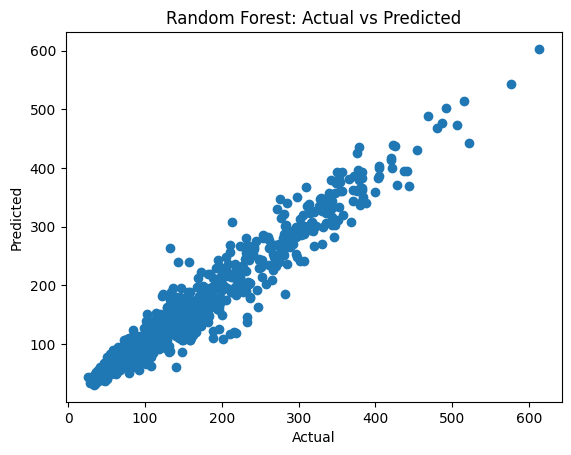

In [ ]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.show()





Linear Regression Coefficients:
[ 0.80315178  0.47070381  0.02502601  8.38779514 -0.03778825  0.26764177
  0.27866611 -0.12764135 -0.24244239]

Random Forest Feature Importances:
[0.83351888 0.11184619 0.00619749 0.01781194 0.00499727 0.01174644
 0.00468331 0.00476075 0.00443774]


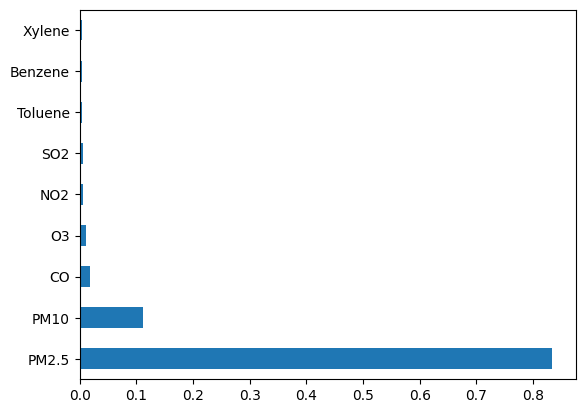

In [ ]:
print("Linear Regression Coefficients:")
print(model_lr.coef_)


print("\nRandom Forest Feature Importances:")
print(model_rf.feature_importances_)


feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()